In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
IS_GAP = False

In [3]:
notebook_home = os.path.abspath('')
stat_results = os.path.join(notebook_home, "stat_results") if IS_GAP else os.path.join(notebook_home, "stat_results_nogap")
lookup_results = os.path.join(notebook_home, "lookup_results") if IS_GAP else os.path.join(notebook_home, "lookup_results_nogap")
modify_results = os.path.join(notebook_home, "modify_results") if IS_GAP else os.path.join(notebook_home, "modify_results_nogap")
enron_stat, github_stat = os.path.join(stat_results, "enron", "output"), os.path.join(stat_results, "github", "output")
enron_lookup, github_lookup = os.path.join(lookup_results, "enron", "output"), os.path.join(lookup_results, "github", "output")
enron_modify, github_modify = os.path.join(modify_results, "enron", "output"), os.path.join(modify_results, "github", "output")

In [4]:
GRAPH_COLOR = cm.YlGnBu
color_dict = {
    "Excel": GRAPH_COLOR(90),
    "TACO": GRAPH_COLOR(250),
    "NoComp": GRAPH_COLOR(190),
    "Antifreeze": GRAPH_COLOR(90),
    "Maximum Dependents": GRAPH_COLOR(190),
    "Longest Path": GRAPH_COLOR(250),
}
style_dict = {
    "TACO": "--",
    "NoComp": "-",
    "Maximum Dependents":"-.",
    "Longest Path": "-"
}
rcParams['font.family'] = 'Serif'
legend_size = 50
label_size = 60
tick_size = 60
fig_width = 16
fig_height = 10

In [5]:
def get_pdf_df(df, column_name, is_log=True):
    ls = [x for x in df[column_name] if x > 10]
    length = len(ls)
    if is_log:
        data = pd.Series(np.log10(ls))
    else:
        data = pd.Series(ls)
    freq = data.value_counts().sort_index(axis=0, ascending=True).reset_index() 
    freq[0] = freq[0] / length
    freq['cumsum'] = np.cumsum(freq[0])
    return freq

In [6]:
def convert_upper_str(num):
    upper_ls = '⁰¹²³⁴⁵⁶⁷⁸⁹'
    index = int(np.log10(num))
    return str(10) + upper_ls[int(np.log10(num))]

In [7]:
def plot_percentile(df_ls, 
                    legend_ls, 
                    xlabel, 
                    ylabel, 
                    x_tick_min,
                    x_tick_max,
                    x_tick_num,
                    fig_size=(fig_width, fig_height),
                    legend_size=legend_size,
                    tick_size=tick_size,
                    label_size=label_size,
                    color_dict=color_dict,
                    save_path=None):
    assert len(df_ls) == len(legend_ls)
    fig, ax = plt.subplots(figsize=fig_size)
    for i in range(len(df_ls)):
        df, label = df_ls[i], legend_ls[i]
        ax.plot(df['index'], df['cumsum'], label=label, color=color_dict[label], linestyle=style_dict[label], linewidth=7.)
    
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_ylabel(ylabel, fontsize=label_size)
    x_ticks = np.arange(x_tick_min, x_tick_max+0.1, step=(x_tick_max - x_tick_min)/x_tick_num).astype(int)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([convert_upper_str(10**x) for x in x_ticks], fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    ax.legend(fontsize=legend_size, loc="lower right")
    ax.grid(True)
    fig.tight_layout()
    
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

In [8]:
def plot_bar_chart(df,
                   file_list,
                   label_column_dict,
                   xlabel,
                   ylabel,
                   y_tick_min,
                   y_tick_max,
                   y_tick_num,
                   bar_width=0.25,
                   fig_size=(fig_width, fig_height),
                   legend_size=legend_size,
                   tick_size=tick_size,
                   label_size=label_size,
                   color_dict=color_dict,
                   is_ceil=True,
                   is_seperate=True,
                   save_path=None
                  ):
    
    x_ticks = np.arange(len(file_list))
    x_ticks_min, x_ticks_max = 100, -100
    bar_labels = list(label_column_dict.keys())
    num_bars = len(bar_labels)
    fig, ax = plt.subplots(figsize=fig_size)
    for idx, bar_label in enumerate(bar_labels):
        x = x_ticks - ((num_bars - 1) * bar_width)/2 + idx * bar_width
        x_ticks_min = min(x.min(), x_ticks_min)
        x_ticks_max = max(x.max(), x_ticks_max)
        arr = df[label_column_dict[bar_label]].values
        arr = np.array([x if x >= 1.0 else 1.0 for x in arr])
        rect = ax.bar(x_ticks - ((num_bars - 1) * bar_width)/2 + idx * bar_width,
                      np.log10(arr) + 0.5,
                      bar_width, label=bar_label,
                      color=color_dict[bar_label],
                      bottom=-0.5
                     )
    
    if is_ceil:
        plt.axhline(y=np.log10(5*60*1000), color="r", linewidth=5)
        plt.text(x_ticks_min+3.38, np.log10(5*60*1000)-0.08, "DNF", 
                 fontsize=48, weight='bold', verticalalignment="top", horizontalalignment="right", color="r")
    if is_seperate:
        plt.axvline(x=(x_ticks_min + x_ticks_max) / 2.0, ymax=np.log10(5*60*1000)-0.1, color='g', ls='--', linewidth=3.0)
    
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_ylabel(ylabel, fontsize=label_size)
    
    y_ticks = np.arange(y_tick_min, y_tick_max+0.1, step=(y_tick_max - y_tick_min)/y_tick_num).astype(int)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([convert_upper_str(10**x) for x in y_ticks], fontsize=tick_size)
    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(file_list, fontsize=tick_size, rotation=-45)
    ax.legend(fontsize=legend_size, loc="upper right", ncol=num_bars)
    plt.xlim(x_ticks_min-bar_width/2.0, x_ticks_max+bar_width/2.0)
    plt.ylim(-0.4, np.log10(5*60*1000) + 0.01)
    plt.grid(axis='y')
    fig.tight_layout()
    
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

# 1. Compressed Formula Graph Sizes

In [9]:
def graph_compare_preprocess(df, is_inrow=False):
    df['Edges_Diff'] = df['numEdges'] - df['numCompEdges']
    df['Edges_Prec'] = df['numCompEdges'] / df['numEdges']
    if not is_inrow:
        pattern_type = ['RR', 'RF', 'FR', 'FF', 'RR-Chain']
        for pattern in pattern_type:
            if pattern != 'RRGap':
                df[pattern + "_Diff"] = df[pattern + "_NoComp"] - df[pattern + "_Comp"]
            else:
                df[pattern + "_Diff"] = 0
                gaps = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven']
                for gap in gaps:
                    pattern_name = pattern + gap
                    df[pattern + "_Diff"] += (df[pattern_name + "_NoComp"] - df[pattern_name + "_Comp"])
    return df

In [10]:
df_enron_stat = graph_compare_preprocess(pd.read_csv(enron_stat + "/" + "enron_taco_dollar_stat.csv"))
df_github_stat = graph_compare_preprocess(pd.read_csv(github_stat + "/" + "github_taco_dollar_stat.csv"))
df_enron_inrow_stat = graph_compare_preprocess(pd.read_csv(enron_stat + "/" + "enron_taco_inrow_stat.csv"), True)
df_github_inrow_stat = graph_compare_preprocess(pd.read_csv(github_stat + "/" + "github_taco_inrow_stat.csv"), True)

## 1.1 Formula graph sizes after TACO compression (low is better)

In [11]:
df_graph_enron_compare = pd.DataFrame()
df_graph_enron_compare.index = ['NoComp', 'TACO-Inrow', 'TACO']
df_graph_enron_compare['Vertices'] = [df_enron_stat['numVertices'].sum(), df_enron_inrow_stat['numCompVertices'].sum(), df_enron_stat['numCompVertices'].sum()]
df_graph_enron_compare['Edges'] = [df_enron_stat['numEdges'].sum(), df_enron_inrow_stat['numCompEdges'].sum(), df_enron_stat['numCompEdges'].sum()]
df_graph_enron_compare['Vertices_Percentage'] = df_graph_enron_compare['Vertices'] / df_graph_enron_compare['Vertices'].max()
df_graph_enron_compare['Edges_Percentage'] = df_graph_enron_compare['Edges'] / df_graph_enron_compare['Edges'].max()
df_graph_enron_compare

,Vertices,Edges,Vertices_Percentage,Edges_Percentage
NoComp,18645760,23733499,1.000000,1.000000
TACO-Inrow,7680116,12521118,0.411896,0.527572
TACO,1173102,1183680,0.062915,0.049874


In [12]:
df_graph_github_compare = pd.DataFrame()
df_graph_github_compare.index = ['NoComp', 'TACO-Inrow', 'TACO']
df_graph_github_compare['Vertices'] = [df_github_stat['numVertices'].sum(), df_github_inrow_stat['numCompVertices'].sum(), df_github_stat['numCompVertices'].sum()]
df_graph_github_compare['Edges'] = [df_github_stat['numEdges'].sum(), df_github_inrow_stat['numCompVertices'].sum(), df_github_stat['numCompEdges'].sum()]
df_graph_github_compare['Vertices_Percentage'] = df_graph_github_compare['Vertices'] / df_graph_github_compare['Vertices'].max()
df_graph_github_compare['Edges_Percentage'] = df_graph_github_compare['Edges'] / df_graph_github_compare['Edges'].max()
df_graph_github_compare

,Vertices,Edges,Vertices_Percentage,Edges_Percentage
NoComp,165771046,179788109,1.000000,1.000000
TACO-Inrow,55202083,55202083,0.333002,0.307040
TACO,4192821,3493528,0.025293,0.019431


## 1.2 The number of edges reduced by TACO (high is better)

In [13]:
df_enron_edge_reduce = pd.DataFrame()
df_enron_edge_reduce['TACO-Inrow'] = df_enron_inrow_stat['Edges_Diff']
df_enron_edge_reduce['TACO'] = df_enron_stat['Edges_Diff']
df_enron_edge_reduce.describe().T[['max', '75%', '50%', 'mean']]

,max,75%,50%,mean
TACO-Inrow,142396.0,18196.0,12488.5,18876.062290
TACO,700155.0,37285.5,18379.5,37962.658249


In [14]:
df_github_edge_reduce = pd.DataFrame()
df_github_edge_reduce['TACO-Inrow'] = df_github_inrow_stat['Edges_Diff']
df_github_edge_reduce['TACO'] = df_github_stat['Edges_Diff']
df_github_edge_reduce.describe().T[['max', '75%', '50%', 'mean']]

,max,75%,50%,mean
TACO-Inrow,1693698.0,42728.0,19703.5,45303.024532
TACO,3139011.0,75552.5,31607.5,78632.730152


## 1.3 Remaining edge fractions after compression (low is better)

In [15]:
df_enron_edge_prec = pd.DataFrame()
df_enron_edge_prec['TACO-Inrow'] = df_enron_inrow_stat['Edges_Prec']
df_enron_edge_prec['TACO'] = df_enron_stat['Edges_Prec']
df_enron_edge_prec.describe().T[['min', '25%', '50%', 'mean']]

,min,25%,50%,mean
TACO-Inrow,0.000042,0.063182,0.398134,0.422732
TACO,0.000042,0.004712,0.019261,0.073657


In [16]:
df_github_edge_prec = pd.DataFrame()
df_github_edge_prec['TACO-Inrow'] = df_github_inrow_stat['Edges_Prec']
df_github_edge_prec['TACO'] = df_github_stat['Edges_Prec']
df_github_edge_prec.describe().T[['min', '25%', '50%', 'mean']]

,min,25%,50%,mean
TACO-Inrow,0.000005,0.000994,0.174480,0.364801
TACO,0.000005,0.000317,0.001901,0.034441


## 1.4 Number of edges reduced by each pattern (high is better)

In [17]:
df_enron_pattern_reduce = pd.DataFrame()
pattern_type = ['RR', 'RF', 'FR', 'FF', 'RR-Chain']
for pattern in pattern_type:
    df_enron_pattern_reduce[pattern] = df_enron_stat[pattern + "_Diff"]
df_enron_pattern_stat = pd.DataFrame()
df_enron_pattern_stat.index = df_enron_pattern_reduce.T.index
df_enron_pattern_stat['Sum'] = df_enron_pattern_reduce.sum()
df_enron_pattern_stat['Max'] = df_enron_pattern_reduce.max()
df_enron_pattern_stat

,Sum,Max
RR,17412246,525026
RF,1880,1413
FR,150845,13815
FF,3844351,174948
RR-Chain,566348,24596


In [18]:
df_github_pattern_reduce = pd.DataFrame()
pattern_type = ['RR', 'RF', 'FR', 'FF', 'RR-Chain']
for pattern in pattern_type:
    df_github_pattern_reduce[pattern] = df_github_stat[pattern + "_Diff"]
df_github_pattern_stat = pd.DataFrame()
df_github_pattern_stat.index = df_github_pattern_reduce.T.index
df_github_pattern_stat['Sum'] = df_github_pattern_reduce.sum()
df_github_pattern_stat['Max'] = df_github_pattern_reduce.max()
df_github_pattern_stat

,Sum,Max
RR,141876182,2094936
RF,13361,9999
FR,178609,39008
FF,24784621,1043702
RR-Chain,5867728,399996


# 2. Building Graphs

In [19]:
column_list = ['fileName', 'GraphBuildTime']
df_enron_taco_max = pd.read_csv(f"{enron_lookup}/enron_max_taco_10k_1.csv")[column_list]
df_enron_taco_long = pd.read_csv(f"{enron_lookup}/enron_long_taco_10k_1.csv")[column_list]
df_enron_nocomp_max = pd.read_csv(f"{enron_lookup}/enron_max_nocomp_10k_1.csv")[column_list]
df_enron_nocomp_long = pd.read_csv(f"{enron_lookup}/enron_long_nocomp_10k_1.csv")[column_list]
df_github_taco_max =  pd.read_csv(f"{github_lookup}/github_max_taco_10k_1.csv")[column_list]
df_github_taco_long = pd.read_csv(f"{github_lookup}/github_long_taco_10k_1.csv")[column_list]
df_github_nocomp_max = pd.read_csv(f"{github_lookup}/github_max_nocomp_10k_1.csv")[column_list]
df_github_nocomp_long = pd.read_csv(f"{github_lookup}/github_long_nocomp_10k_1.csv")[column_list]

In [20]:
df_enron_taco = pd.merge(df_enron_taco_max, df_enron_taco_long, how="inner", on=["fileName"])
df_enron_nocomp = pd.merge(df_enron_nocomp_max, df_enron_nocomp_long, how="inner", on=["fileName"])
df_enron_taco['TACO_GraphBuildTime'] = (df_enron_taco['GraphBuildTime_x'] + df_enron_taco['GraphBuildTime_y']) / 2.
df_enron_nocomp['NoComp_GraphBuildTime'] = (df_enron_nocomp['GraphBuildTime_x'] + df_enron_nocomp['GraphBuildTime_y']) / 2.

In [21]:
enron_graph_result = pd.merge(df_enron_taco, df_enron_nocomp, how="inner", on=['fileName'])[['fileName', 'TACO_GraphBuildTime', 'NoComp_GraphBuildTime']]

In [22]:
freq_enron_taco = get_pdf_df(enron_graph_result, 'TACO_GraphBuildTime')
freq_enron_nocomp = get_pdf_df(enron_graph_result, 'NoComp_GraphBuildTime')

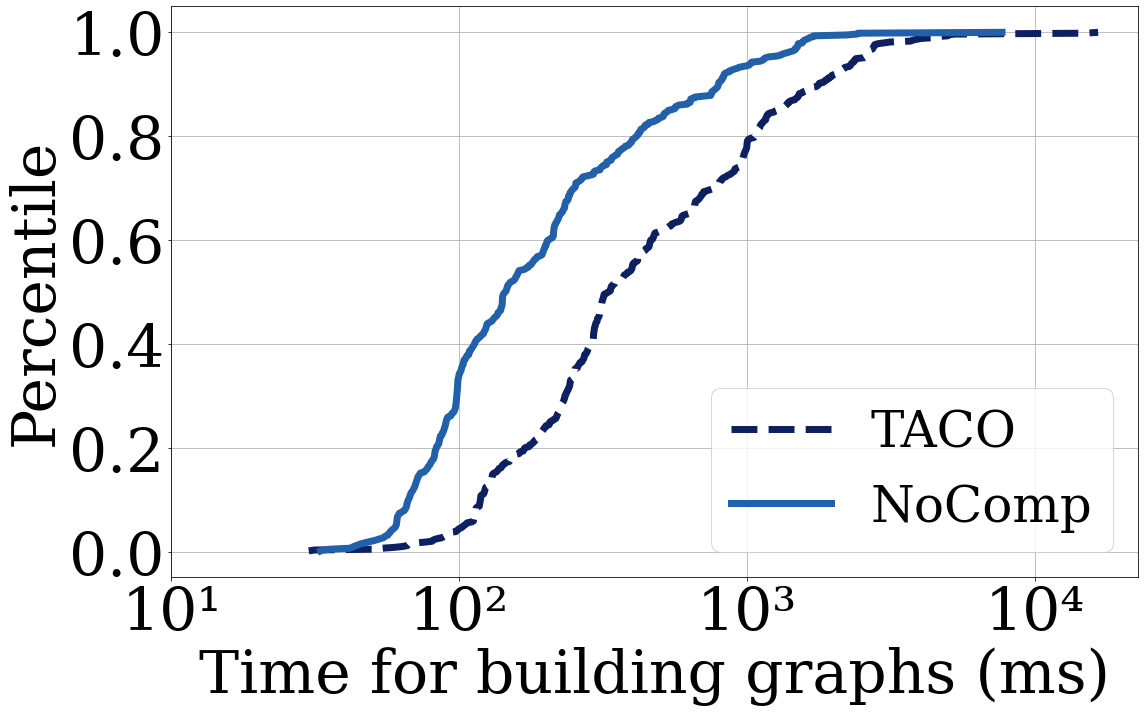

In [23]:
plot_percentile([freq_enron_taco, freq_enron_nocomp], 
                ["TACO", "NoComp"],
                xlabel="Time for building graphs (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=4,
                x_tick_num=3,
                save_path="./figures/enron_graph_build_compare.pdf"
               )

In [24]:
df_github_taco = pd.merge(df_github_taco_max, df_github_taco_long, how="inner", on=["fileName"])
df_github_nocomp = pd.merge(df_github_nocomp_max, df_github_nocomp_long, how="inner", on=["fileName"])
df_github_taco['TACO_GraphBuildTime'] = (df_github_taco['GraphBuildTime_x'] + df_github_taco['GraphBuildTime_y']) / 2.
df_github_nocomp['NoComp_GraphBuildTime'] = (df_github_nocomp['GraphBuildTime_x'] + df_github_nocomp['GraphBuildTime_y']) / 2.

In [25]:
github_graph_result = pd.merge(df_github_taco, df_github_nocomp, how="inner", on=['fileName'])[['fileName', 'TACO_GraphBuildTime', 'NoComp_GraphBuildTime']]

In [26]:
freq_github_taco = get_pdf_df(github_graph_result, 'TACO_GraphBuildTime')
freq_github_nocomp = get_pdf_df(github_graph_result, 'NoComp_GraphBuildTime')

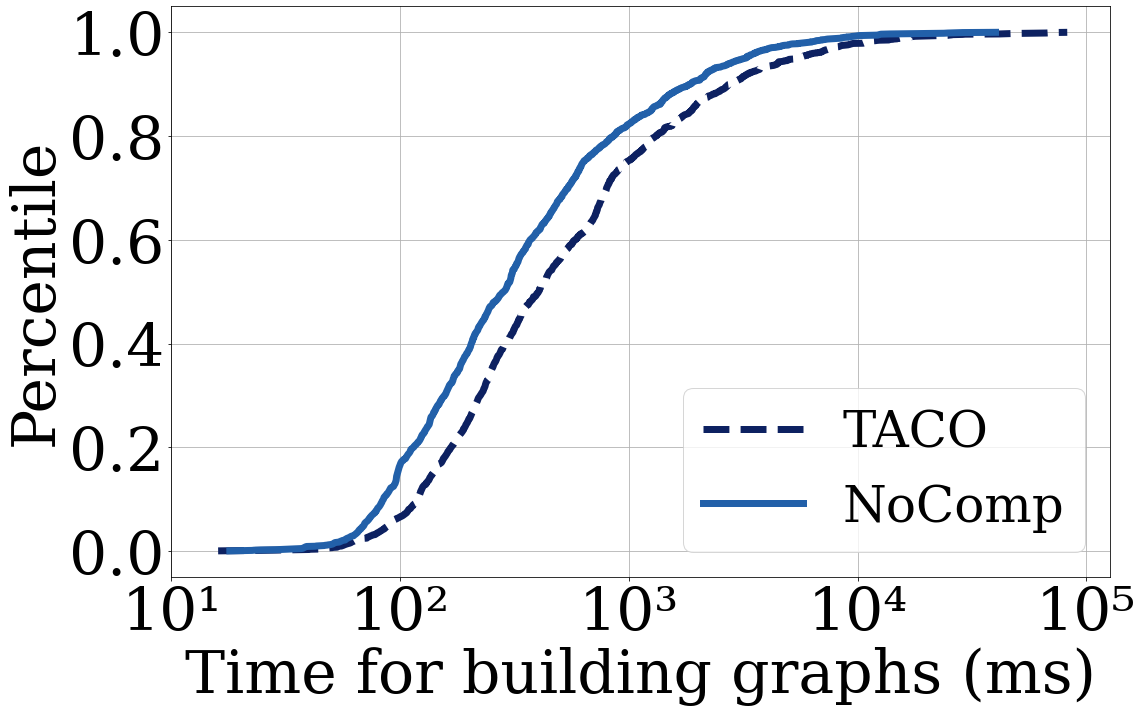

In [27]:
plot_percentile([freq_github_taco, freq_github_nocomp], 
                ["TACO", "NoComp"],
                xlabel="Time for building graphs (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=5,
                x_tick_num=4,
                save_path="./figures/github_graph_build_compare.pdf"
               )

# 3. Returning Control to Users

In [28]:
def rename_columns(df, is_long=False):
    rename_map = {
        "TACOLookupSize": "taco_size",
        "TACOLookupTime": "taco_time",
        "TACOPostProcessedLookupSize": "taco_post_size",
        "TACOPostProcessedLookupTime": "taco_post_time",
        "NoCompLookupSize": "nocomp_size",
        "NoCompLookupTime": "nocomp_time",
        "NoCompPostProcessedLookupSize": "nocomp_post_size",
        "NoCompPostProcessedLookupTime": "nocomp_post_time",
    }
    
    if is_long:
        for key in rename_map:
            rename_map[key] = "long_" + rename_map[key]
    else:
        for key in rename_map:
            rename_map[key] = "max_" + rename_map[key]
            
    df = df.rename(columns=rename_map)
    if "GraphBuildTime" in list(df.columns):
        df = df.drop(['GraphBuildTime'], axis=1)
    
    remain_cols = [x for x in list(df.columns) if "post" not in x]
    return df[remain_cols]

In [29]:
def read_and_average_files(dir_path, fileName, is_long=False):
    df = rename_columns(pd.read_csv(dir_path + "/" + fileName + "_1.csv"), is_long)
    df2 = rename_columns(pd.read_csv(dir_path + "/" + fileName + "_2.csv"), is_long)
    df3 = rename_columns(pd.read_csv(dir_path + "/" + fileName + "_3.csv"), is_long)
    column_list = list(df.columns)
    df_merged = pd.merge(df, df2, how="inner", on=[column_list[0], column_list[1]])
    df_merged = pd.merge(df_merged, df3, how="inner", on=[column_list[0], column_list[1]])
    list1, list2 = [], []
    for i in range(len(df_merged)):
        ls = [df_merged.loc[i, col_name] for col_name in list(df_merged.columns) if column_list[2] in col_name]
        ls2 = [df_merged.loc[i, col_name] for col_name in list(df_merged.columns) if column_list[3] in col_name]
        list1.append(np.mean(ls))
        list2.append(np.mean(ls2))
    df_merged[column_list[2]] = list1
    df_merged[column_list[3]] = list2
    return df_merged[column_list]

In [30]:
df_enron_taco_max = read_and_average_files(enron_lookup, "enron_max_taco_10k", False)
df_enron_taco_long = read_and_average_files(enron_lookup, "enron_long_taco_10k", True)
df_enron_nocomp_max = read_and_average_files(enron_lookup, "enron_max_nocomp_10k", False)
df_enron_nocomp_long = read_and_average_files(enron_lookup, "enron_long_nocomp_10k", True)
df_github_taco_max = read_and_average_files(github_lookup, "github_max_taco_10k", False)
df_github_taco_long = read_and_average_files(github_lookup, "github_long_taco_10k", True)
df_github_nocomp_max = read_and_average_files(github_lookup, "github_max_nocomp_10k", False)
df_github_nocomp_long = read_and_average_files(github_lookup, "github_long_nocomp_10k", True)

In [31]:
df_github_nocomp_long.head()

,fileName,Longest Dep Ref,long_nocomp_size,long_nocomp_time
0,1. Excel Homework.xlsx,Sheet1:J3248,1.0,24.333333
1,2019-05-23-0936_empty_racir.xlsx,Measurements:C11,5610.0,142.666667
2,NIRISS_SIAF.xlsx,DDC:C20,22.0,0.333333
3,工作簿1-20181122170204822.xlsx,不良明细:CEA5,2.0,0.000000
4,W22704-181.xlsx,Sheet1:D2,14196.0,136.666667


In [32]:
df_enron_max = pd.merge(df_enron_taco_max, df_enron_nocomp_max, how="inner", on=["fileName", "Max Dep Ref"])
df_enron_long = pd.merge(df_enron_taco_long, df_enron_nocomp_long, how="inner", on=["fileName", "Longest Dep Ref"])

In [33]:
df_enron_merged = pd.merge(df_enron_max, df_enron_long, how="inner", on=["fileName"])
# df_enron_merged.to_csv("./enron_result_merged.csv", index=False)

In [34]:
df_enron_merged.head()

,fileName,Max Dep Ref,max_taco_size,max_taco_time,max_nocomp_size,max_nocomp_time,Longest Dep Ref,long_taco_size,long_taco_time,long_nocomp_size,long_nocomp_time
0,stacey_white_000_1_1.pst.254.xls,AlphaSort:F6836,3.0,10.000000,3.0,25.333333,AlphaSort:F4400,3.0,10.000000,3.0,25.333333
1,darron_c_giron_002_1_1_1.pst.177.xls,Darron:E5,205.0,8.666667,2978.0,70.666667,Darron:J4,205.0,9.333333,2978.0,88.333333
2,stacey_white_000_1_1.pst.262.xls,BRA Power:A6,28.0,1.000000,4385.0,123.000000,BRA Power:A6,28.0,1.000000,4385.0,139.666667
3,mike_grigsby_000_1_1_1.pst.248.xls,Months:F4,4.0,0.333333,306.0,1.666667,Months:F4,4.0,0.333333,306.0,1.333333
4,kevin_ruscitti_000_1_1.pst.156.xls,03-21-00AM:BT499,1.0,0.666667,1.0,0.000000,03-21-00AM:X531,1.0,0.000000,1.0,1.000000


In [35]:
df_github_max = pd.merge(df_github_taco_max, df_github_nocomp_max, how="inner", on=["fileName", "Max Dep Ref"])
df_github_long = pd.merge(df_github_taco_long, df_github_nocomp_long, how="inner", on=["fileName", "Longest Dep Ref"])

In [36]:
df_github_merged = pd.merge(df_github_max, df_github_long, how="inner", on=["fileName"])
# df_github_merged.to_csv("./github_result_merged.csv", index=False)

In [37]:
most_dep = []
most_time = []
most_nocomp_time = []
for i in range(len(df_enron_merged)):
    max_time, long_time = df_enron_merged.loc[i, 'max_taco_time'], df_enron_merged.loc[i, 'long_taco_time']
    max_nocomp_time, long_nocomp_time = df_enron_merged.loc[i, 'max_nocomp_time'], df_enron_merged.loc[i, 'long_nocomp_time']
    if max_time > long_time:
        most_dep.append("m")
        most_time.append(df_enron_merged.loc[i, 'max_taco_time'])
    else:
        most_dep.append("l")
        most_time.append(df_enron_merged.loc[i, 'long_taco_time'])
    if max_nocomp_time > long_nocomp_time:
        most_nocomp_time.append(max_nocomp_time)
    else:
        most_nocomp_time.append(long_nocomp_time)
df_enron_merged['most_dep'] = most_dep
df_enron_merged['most_time'] = most_time
df_enron_merged['most_nocomp_time'] = most_nocomp_time

In [38]:
df_enron_merged.sort_values(by="most_time", ascending=False).head(10)

,fileName,Max Dep Ref,max_taco_size,max_taco_time,max_nocomp_size,max_nocomp_time,Longest Dep Ref,long_taco_size,long_taco_time,long_nocomp_size,long_nocomp_time,most_dep,most_time,most_nocomp_time
43,joe_parks_000_1_1.pst.133.xls,Variable Rates - Sept:P5,3535.0,77.666667,18786.0,111.666667,Variable Rates - Sept:B5,18.0,0.000000,158.0,1.000000,m,77.666667,111.666667
19,kevin_ruscitti_000_1_1.pst.125.xls,Phys Test:D15,6479.0,63.000000,6479.0,45.000000,Phys Test:E15,6479.0,59.000000,6479.0,45.666667,m,63.000000,45.666667
90,benjamin_rogers_001_1_1.pst.153.xls,Template:E445,2971.0,41.000000,4545.0,44.666667,Curve Paste:BU217,1.0,0.333333,84.0,1.000000,m,41.000000,44.666667
178,benjamin_rogers_000_1_1.pst.140.xls,Template:E445,2971.0,37.000000,4545.0,39.000000,Curve Paste:BU217,1.0,0.000000,84.0,0.000000,m,37.000000,39.000000
428,jim_schwieger_000_1_1.pst.110.xls,Sheet2:J5,2436.0,35.666667,4212.0,46.333333,Sheet2:J5,2436.0,36.333333,4212.0,50.666667,l,36.333333,50.666667
306,gerald_nemec_000_1_1.pst.11.xls,Cash Flows:B12,2760.0,31.000000,4266.0,35.333333,Cash Flows:B47,2636.0,31.666667,3561.0,28.000000,l,31.666667,35.333333
280,vkaminski_001_1_2_1.pst.62.xls,5b. 7.3:D4,1029.0,29.333333,29029.0,245.666667,5b. 7.3:D4,1029.0,28.666667,29029.0,273.333333,m,29.333333,273.333333
529,jeff_dasovich_000_1_1_1.pst.138.xls,SCE Assessment:C44,2042.0,23.666667,3567.0,29.333333,PG&E Assessment:C40,2752.0,28.333333,3422.0,31.333333,l,28.333333,31.333333
99,benjamin_rogers_000_1_1.pst.190.xls,CCFMODEL:H10,2033.0,27.333333,2973.0,34.666667,CALC:FA17,80.0,1.333333,7707.0,129.333333,m,27.333333,129.333333
412,benjamin_rogers_000_1_1.pst.191.xls,CCFMODEL:H10,2033.0,26.666667,2973.0,35.666667,CALC:FA17,83.0,1.000000,7390.0,118.333333,m,26.666667,118.333333


In [39]:
most_dep = []
most_time = []
most_nocomp_time = []
for i in range(len(df_github_merged)):
    max_time, long_time = df_github_merged.loc[i, 'max_taco_time'], df_github_merged.loc[i, 'long_taco_time']
    max_nocomp_time, long_nocomp_time = df_github_merged.loc[i, 'max_nocomp_time'], df_github_merged.loc[i, 'long_nocomp_time']
    if max_time > long_time:
        most_dep.append("m")
        most_time.append(df_github_merged.loc[i, 'max_taco_time'])
    else:
        most_dep.append("l")
        most_time.append(df_github_merged.loc[i, 'long_taco_time'])
    if max_nocomp_time > long_nocomp_time:
        most_nocomp_time.append(max_nocomp_time)
    else:
        most_nocomp_time.append(long_nocomp_time)
df_github_merged['most_dep'] = most_dep
df_github_merged['most_time'] = most_time
df_github_merged['most_nocomp_time'] = most_nocomp_time
df_github_merged.sort_values(by="most_time", ascending=False).head(10)

,fileName,Max Dep Ref,max_taco_size,max_taco_time,max_nocomp_size,max_nocomp_time,Longest Dep Ref,long_taco_size,long_taco_time,long_nocomp_size,long_nocomp_time,most_dep,most_time,most_nocomp_time
1375,Binno test Status Nov01_2018.xlsx,Test_worksheet:B104,23484.0,163.666667,23484.0,211.000000,Test_worksheet:B104,23484.0,167.000000,23484.0,218.333333,l,167.000000,218.333333
1211,standard_deviation_full.xlsx,Sheet1:AA2,11520.0,151.666667,23040.0,194.666667,Sheet1:AA2,11520.0,144.333333,23040.0,166.666667,m,151.666667,194.666667
726,zadanie5.xlsx,dane:B19,18182.0,110.333333,21816.0,181.666667,dane:E2,18264.0,112.666667,18264.0,173.333333,l,112.666667,181.666667
498,Zbiornik.xlsx,Arkusz2:B14,14569.0,106.666667,21845.0,221.000000,Arkusz2:D2,14616.0,111.666667,18267.0,154.666667,l,111.666667,221.000000
21,kevin_ruscitti__20327__NGPL_StorageE_Test.xlsx,Phys Test:F15,6479.0,65.333333,6479.0,51.000000,Phys Test:F15,6479.0,70.000000,6479.0,44.666667,l,70.000000,51.000000
1536,rcv_ep2.xlsx,rcv_ep2:BGJ123,3.0,0.000000,8.0,0.000000,rcv_ep2:E640,6407.0,68.333333,14951.0,153.000000,l,68.333333,153.000000
2019,Signals.xlsx,Signal Verification0:H3,6006.0,65.333333,15983.0,193.000000,Signal Verification0:G3,6006.0,67.333333,15983.0,203.000000,l,67.333333,203.000000
1209,VT_EUReg_IND_V1p7.xlsx,IAL ICU INF:F193,4925.0,56.000000,7326.0,96.000000,ICM ILM IGF IGH INM:P114,123.0,1.666667,183.0,2.666667,m,56.000000,96.000000
731,LR2.xlsx,Задание 1:B1,1215.0,52.333333,2430.0,20.666667,Задание 1:B3,5.0,3.666667,1215.0,8.666667,m,52.333333,20.666667
1011,teeeest.xlsx,18:B5,3164.0,48.666667,6331.0,108.666667,18:BI5,1995.0,36.000000,3993.0,58.666667,m,48.666667,108.666667


### CDF Plot

In [40]:
freq_enron_max_taco_size = get_pdf_df(df_enron_merged, 'max_taco_size', True)
freq_enron_max_nocomp_size = get_pdf_df(df_enron_merged, 'max_nocomp_size', True)
freq_enron_max_taco_time = get_pdf_df(df_enron_merged, 'max_taco_time', True)
freq_enron_max_nocomp_time = get_pdf_df(df_enron_merged, 'max_nocomp_time', True)
freq_enron_long_taco_size = get_pdf_df(df_enron_merged, 'long_taco_size', True)
freq_enron_long_nocomp_size = get_pdf_df(df_enron_merged, 'long_nocomp_size', True)
freq_enron_long_taco_time = get_pdf_df(df_enron_merged, 'long_taco_time', True)
freq_enron_long_nocomp_time = get_pdf_df(df_enron_merged, 'long_nocomp_time', True)

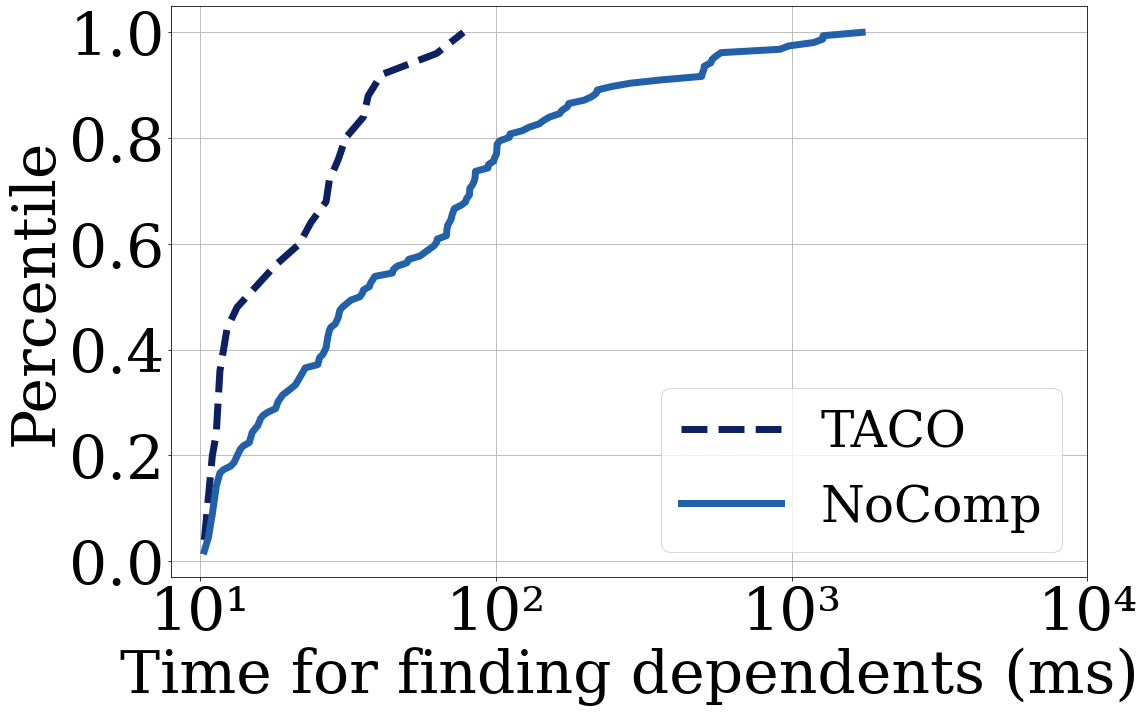

In [41]:
plot_percentile([freq_enron_max_taco_time, freq_enron_max_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="Time for finding dependents (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=4,
                x_tick_num=3,
                save_path="./figures/enron_lookup_time_max_compare.pdf"
               )

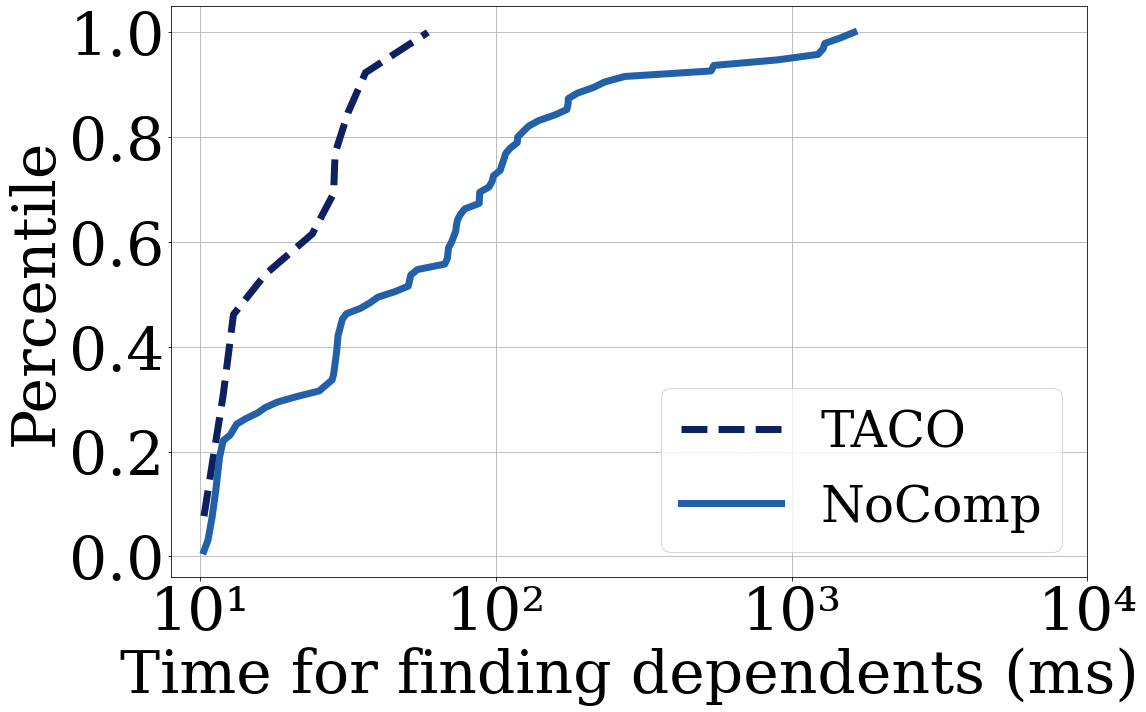

In [42]:
plot_percentile([freq_enron_long_taco_time, freq_enron_long_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="Time for finding dependents (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=4,
                x_tick_num=3,
                save_path="./figures/enron_lookup_time_long_compare.pdf"
               )

In [43]:
freq_github_max_taco_size = get_pdf_df(df_github_merged, 'max_taco_size', True)
freq_github_max_nocomp_size = get_pdf_df(df_github_merged, 'max_nocomp_size', True)
freq_github_max_taco_time = get_pdf_df(df_github_merged, 'max_taco_time', True)
freq_github_max_nocomp_time = get_pdf_df(df_github_merged, 'max_nocomp_time', True)
freq_github_long_taco_size = get_pdf_df(df_github_merged, 'long_taco_size', True)
freq_github_long_nocomp_size = get_pdf_df(df_github_merged, 'long_nocomp_size', True)
freq_github_long_taco_time = get_pdf_df(df_github_merged, 'long_taco_time', True)
freq_github_long_nocomp_time = get_pdf_df(df_github_merged, 'long_nocomp_time', True)

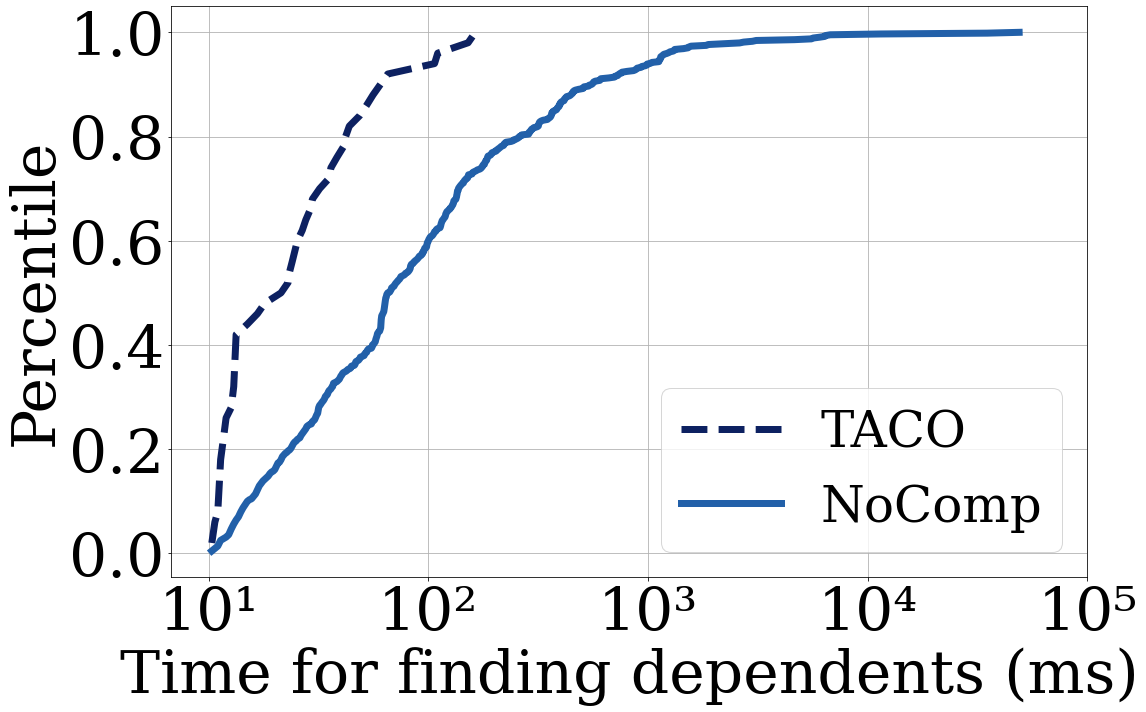

In [44]:
plot_percentile([freq_github_max_taco_time, freq_github_max_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="Time for finding dependents (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=5,
                x_tick_num=4,
                save_path="./figures/github_lookup_time_max_compare.pdf"
               )

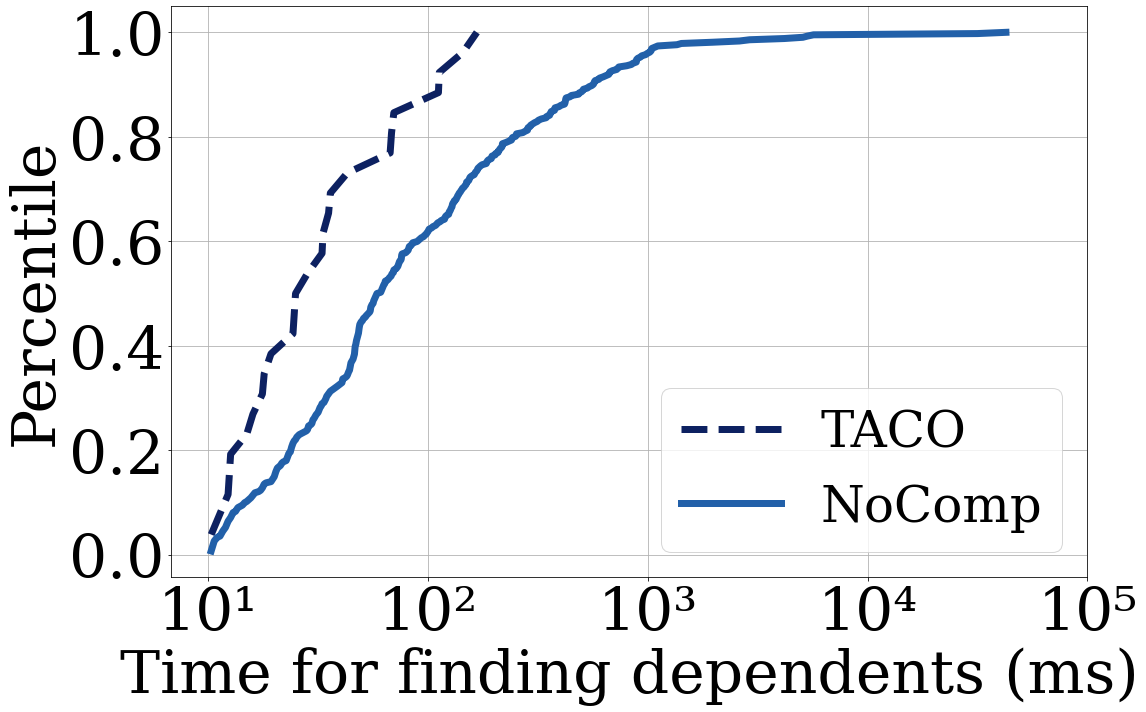

In [45]:
plot_percentile([freq_github_long_taco_time, freq_github_long_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="Time for finding dependents (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=5,
                x_tick_num=4,
                save_path="./figures/github_lookup_time_long_compare.pdf"
               )

### Analyze Enron results

In [46]:
df_github_merged[(df_github_merged["max_taco_time"] > df_github_merged["max_nocomp_time"]) & (df_github_merged["max_nocomp_time"] > 10)]

,fileName,Max Dep Ref,max_taco_size,max_taco_time,max_nocomp_size,max_nocomp_time,Longest Dep Ref,long_taco_size,long_taco_time,long_nocomp_size,long_nocomp_time,most_dep,most_time,most_nocomp_time
21,kevin_ruscitti__20327__NGPL_StorageE_Test.xlsx,Phys Test:F15,6479.0,65.333333,6479.0,51.000000,Phys Test:F15,6479.0,70.000000,6479.0,44.666667,l,70.000000,51.000000
731,LR2.xlsx,Задание 1:B1,1215.0,52.333333,2430.0,20.666667,Задание 1:B3,5.0,3.666667,1215.0,8.666667,m,52.333333,20.666667
886,Real-Statistics-Examples-Regression-2.xlsx,IPFP 3.2:D9,2014.0,36.000000,3409.0,33.666667,IPFP 3.2:E6,1988.0,35.333333,3409.0,32.333333,m,36.000000,33.666667
1342,NKSC - 17 - new.xlsx,SC-I:F37,1306.0,21.333333,1354.0,14.333333,NXT:B76,3.0,0.000000,71.0,0.000000,m,21.333333,14.333333
1506,COVID-19 w Polsce.xlsx,Wzrost w województwach:B24,2476.0,27.666667,2476.0,26.666667,Wzrost:B3,16.0,0.000000,2237.0,41.000000,m,27.666667,41.000000


In [47]:
df_larger_than = df_enron_merged[(df_enron_merged["max_taco_time"] > df_enron_merged["max_nocomp_time"]) & (df_enron_merged["max_nocomp_time"] > 10)]
df_larger_than[["fileName", "max_taco_time", "max_nocomp_time"]]

,fileName,max_taco_time,max_nocomp_time
19,kevin_ruscitti_000_1_1.pst.125.xls,63.000000,45.000000
46,tracy_geaccone_000_1_1.pst.268.xls,13.333333,10.666667
66,tracy_geaccone_000_1_1.pst.146.xls,11.666667,10.666667
162,paul_y'barbo_000_1_1.pst.61.xls,12.333333,11.000000
213,paul_y'barbo_000_1_1.pst.26.xls,11.333333,11.000000
324,tracy_geaccone_000_1_1.pst.151.xls,11.000000,10.333333
579,tracy_geaccone_000_1_1.pst.237.xls,11.000000,10.333333


In [48]:
threshold=500
df_enron_merged[df_enron_merged["max_nocomp_time"] > threshold][["fileName", "max_nocomp_time"]]

,fileName,max_nocomp_time
87,dutch_quigley_000_1_1.pst.51.xls,1188.666667
127,mike_grigsby_000_1_1_1.pst.106.xls,555.333333
144,matthew_lenhart_000_1_1.pst.23.xls,538.000000
197,matthew_lenhart_000_1_1.pst.20.xls,505.000000
267,harry_arora_000_1_1.pst.130.xls,911.666667
301,mike_grigsby_000_1_1_1.pst.108.xls,533.000000
375,jim_schwieger_000_1_1.pst.100.xls,979.333333
446,benjamin_rogers_000_1_1.pst.39.xls,1730.333333
523,phillip_allen_000_1_1.pst.253.xls,506.000000
562,matthew_lenhart_000_1_1.pst.19.xls,576.666667


In [49]:
df_enron_merged[df_enron_merged["long_nocomp_time"] > threshold][["fileName", "long_nocomp_time"]]

,fileName,long_nocomp_time
87,dutch_quigley_000_1_1.pst.51.xls,1464.000000
267,harry_arora_000_1_1.pst.130.xls,894.666667
375,jim_schwieger_000_1_1.pst.100.xls,1228.333333
446,benjamin_rogers_000_1_1.pst.39.xls,1624.666667
527,john_griffith_000_1_1.pst.185.xls,534.333333
564,jim_schwieger_000_1_1.pst.71.xls,1278.000000
577,kevin_presto_000_1_1.pst.16.xls,546.333333
586,jim_schwieger_000_1_1.pst.106.xls,1295.666667


In [50]:
df_enron_merged[df_enron_merged["max_taco_time"] > threshold][["fileName", "max_taco_time"]]

,fileName,max_taco_time


In [51]:
df_enron_merged[df_enron_merged["long_taco_time"] > threshold][["fileName", "long_taco_time"]]

,fileName,long_taco_time


### Analyze github dataset

In [52]:
df_larger_than = df_github_merged[(df_github_merged["max_taco_time"] > df_github_merged["max_nocomp_time"]) & (df_github_merged["max_nocomp_time"] > 10)]
df_larger_than[["fileName", "max_taco_time", "max_nocomp_time"]]

,fileName,max_taco_time,max_nocomp_time
21,kevin_ruscitti__20327__NGPL_StorageE_Test.xlsx,65.333333,51.000000
731,LR2.xlsx,52.333333,20.666667
886,Real-Statistics-Examples-Regression-2.xlsx,36.000000,33.666667
1342,NKSC - 17 - new.xlsx,21.333333,14.333333
1506,COVID-19 w Polsce.xlsx,27.666667,26.666667


In [53]:
threshold=500
df_github_merged[df_github_merged["max_nocomp_time"] > threshold][["fileName", "max_nocomp_time"]]

,fileName,max_nocomp_time
10,Fact2Sheet_Corona_20200607.xlsx,510.666667
152,gaslines_model_public.xlsx,48889.000000
183,Tio Cash Master 1600 1 seventh 0a in the neigh...,1875.666667
206,Excel模拟神经网络进行4000次迭代.xlsx,928.666667
285,WM3796_LT_timeseries_normalization.xlsx,1121.333333
...,...,...
2142,Detroit data (stata & Eviews outputs).xlsx,1124.000000
2176,螺纹_LLT模型-带止损-实盘记录优化版.xlsx,2723.666667
2183,经济总表.xlsx,2612.666667
2199,최경묵_퍼셉트론엑셀.xlsx,892.666667


In [54]:
df_github_merged[df_github_merged["long_nocomp_time"] > threshold][["fileName", "long_nocomp_time"]]

,fileName,long_nocomp_time
152,gaslines_model_public.xlsx,42597.000000
176,CPIvs行业.xlsx,5078.666667
206,Excel模拟神经网络进行4000次迭代.xlsx,1034.666667
496,BurnTest180716.1.xlsx,670.000000
584,Tio Cash Master 0700 PS One Million Test Prime...,664.333333
664,aim120_amraap.xlsx,506.333333
665,InputData.xlsx,1111.333333
708,CovidVaccinationProjection3-3-2021.xlsx,4184.000000
776,Results Database 5.xlsx,926.000000
783,big.xlsx,569.666667


In [55]:
df_github_merged[df_github_merged["max_taco_time"] > threshold][["fileName", "max_taco_time"]]

,fileName,max_taco_time


In [56]:
df_github_merged[df_github_merged["long_taco_time"] > threshold][["fileName", "long_taco_time"]]

,fileName,long_taco_time


# 4. Modify Formula Graph

In [57]:
def load_modify_results(path, filename):
    filename_list = [filename + "_" + str(i) + ".csv" for i in [1, 2, 3]]
    column_list = ['fileName', 'Max Dep Ref', 'GraphModifyTime']
    df1 = pd.read_csv(path + "/" + filename_list[0])
    df2 = pd.read_csv(path + "/" + filename_list[1])
    df3 = pd.read_csv(path + "/" + filename_list[2])
    df = pd.merge(df1, df2, on=column_list[:2], how="inner")
    df = pd.merge(df, df3, on=column_list[:2], how="inner")
    
    time_ls = []
    cand_col = [x for x in list(df.columns) if "GraphModifyTime" in x]
    for i in range(len(df)):
        ls = []
        for col in cand_col:
            ls.append(df.loc[i, col])
        time_ls.append(np.mean(ls))
    df['GraphModifyTime'] = time_ls
    return df[column_list]

In [58]:
enron_nocomp_modify = load_modify_results(enron_modify, "enron_nocomp_modify")
enron_taco_modify = load_modify_results(enron_modify, "enron_taco_modify")
github_nocomp_modify = load_modify_results(github_modify, "github_nocomp_modify")
github_taco_modify = load_modify_results(github_modify, "github_taco_modify")

In [59]:
enron_taco_modify['GraphModifyTime'].mean(), enron_nocomp_modify['GraphModifyTime'].mean()

(3.4856661045531214, 2.602585722315906)

In [60]:
github_taco_modify['GraphModifyTime'].mean(), github_nocomp_modify['GraphModifyTime'].mean()

(2.740806907845765, 3.884323358642237)

In [61]:
enron_taco_modify['GraphModifyTime'].max(), enron_nocomp_modify['GraphModifyTime'].max()

(161.0, 210.33333333333334)

In [62]:
github_taco_modify['GraphModifyTime'].max(), github_nocomp_modify['GraphModifyTime'].max()

(215.0, 2980.6666666666665)

In [63]:
freq_enron_taco_modify = get_pdf_df(enron_taco_modify, 'GraphModifyTime', True)
freq_enron_nocomp_modify = get_pdf_df(enron_nocomp_modify, 'GraphModifyTime', True)

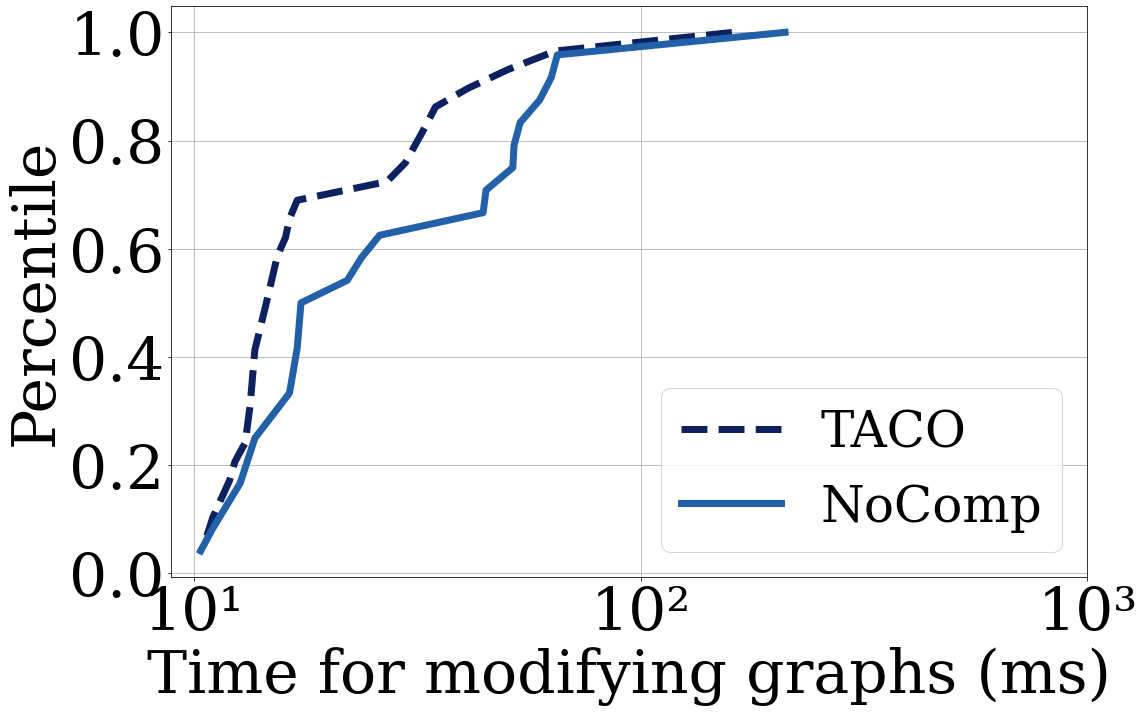

In [64]:
plot_percentile([freq_enron_taco_modify, freq_enron_nocomp_modify], 
                ["TACO", "NoComp"],
                xlabel="Time for modifying graphs (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=3,
                x_tick_num=2,
                save_path="./figures/enron_modify_compare.pdf"
               )

In [65]:
freq_github_taco_modify = get_pdf_df(github_taco_modify, 'GraphModifyTime', True)
freq_github_nocomp_modify = get_pdf_df(github_nocomp_modify, 'GraphModifyTime', True)

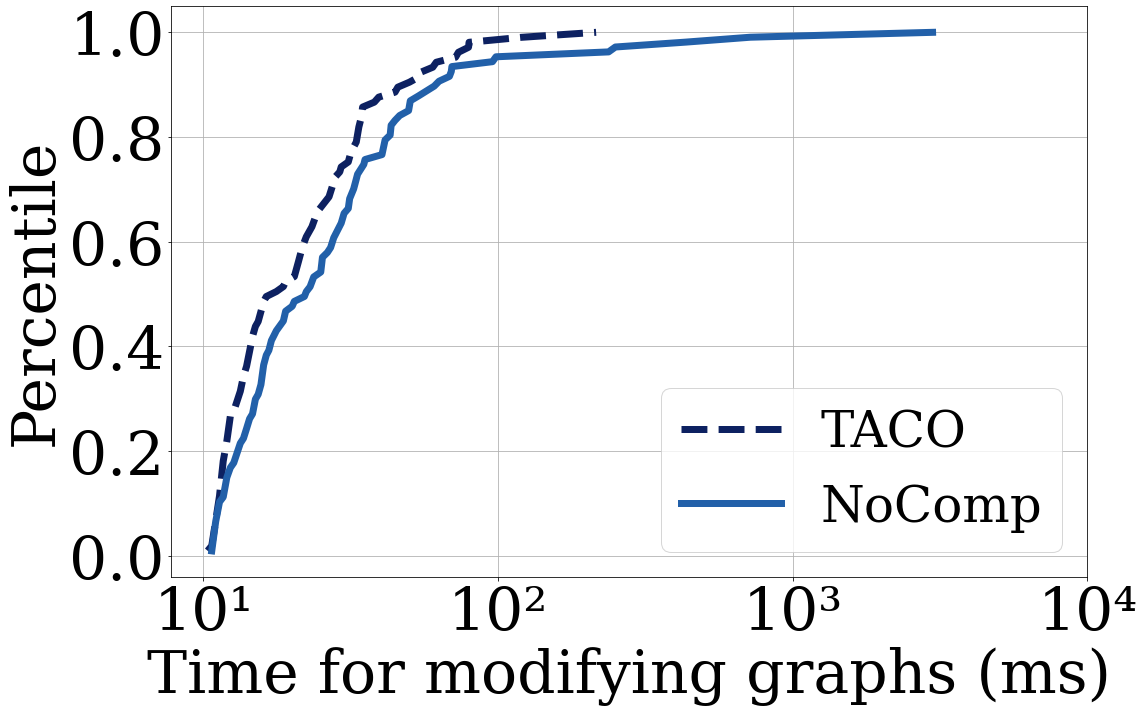

In [66]:
plot_percentile([freq_github_taco_modify, freq_github_nocomp_modify], 
                ["TACO", "NoComp"],
                xlabel="Time for modifying graphs (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=4,
                x_tick_num=3,
                save_path="./figures/github_modify_compare.pdf"
               )

## 5. Top10 Results

In [67]:
def dnf_process(df):
    column_name = ['LookupTime', 'GraphBuildTime', 'GraphModifyTime']
    column_name = [name for name in column_name if name in df.columns]
    MAX_TIME = 5 * 60 * 1000
    for i in range(len(df)):
        for name in column_name:
            if df.loc[i, name] == -1 or df.loc[i, name] >= MAX_TIME:
                df.loc[i, name] = MAX_TIME
    return df

In [68]:
plot_filename_list = ['max' + str(i+1) for i in range(10)]
plot_filename_list.extend(plot_filename_list)
plot_filename_label = [' ' for i in range(len(plot_filename_list) * 2 + 20)]
length = len(plot_filename_label)
plot_filename_label[length // 3] = "Enron"
plot_filename_label[length - length // 3] = "Github"
plot_filename_label = " ".join(plot_filename_label)

In [69]:
filename_order = []
filename_order += enron_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False)['fileName'].tolist()[:10]
filename_order += github_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False)['fileName'].tolist()[:10]

### 5.1 Lookup Time

In [70]:
df_enron_merged['max_taco_time'] = df_enron_merged[['max_taco_time', 'long_taco_time']].T.max()
df_github_merged['max_taco_time'] = df_github_merged[['max_taco_time', 'long_taco_time']].T.max()
df_enron_merged['max_nocomp_time'] = df_enron_merged[['max_nocomp_time', 'long_nocomp_time']].T.max()
df_github_merged['max_nocomp_time'] = df_github_merged[['max_nocomp_time', 'long_nocomp_time']].T.max()

In [71]:
antifreeze_enron_lookup = pd.read_excel("./top10_results/enron_antifreeze_lookup_result.xlsx")
antifreeze_github_lookup = pd.read_excel("./top10_results/github_antifreeze_lookup_result.xlsx")

In [72]:
enron_lookup_top10 = df_enron_merged.sort_values(by="max_taco_time", ascending=False)[['fileName', 'max_taco_time', 'max_nocomp_time']]
github_lookup_top10 = df_github_merged.sort_values(by="max_taco_time", ascending=False)[['fileName', 'max_taco_time', 'max_nocomp_time']]

In [73]:
enron_lookup_compare = dnf_process(pd.merge(enron_lookup_top10, antifreeze_enron_lookup, on=["fileName"], how="inner"))
github_lookup_compare = dnf_process(pd.merge(github_lookup_top10, antifreeze_github_lookup, on=["fileName"], how="inner"))

In [74]:
lookup_compare = pd.concat([enron_lookup_compare, github_lookup_compare]).reset_index(drop=True).set_index("fileName")
lookup_compare = lookup_compare.loc[filename_order].reset_index()
lookup_compare

,fileName,max_taco_time,max_nocomp_time,LookupTime
0,benjamin_rogers_000_1_1.pst.39.xls,3.000000,1730.333333,300000
1,vkaminski_001_1_2_1.pst.62.xls,29.333333,273.333333,300000
2,mark_haedicke_000_1_2.pst.31.xls,24.000000,285.333333,300000
3,gstorey_000_1_1.pst.116.xls,0.333333,25.000000,0
4,john_lavorato_000_1_1_1.pst.57.xls,0.000000,17.000000,0
5,phillip_m_love_000_1_1.pst.476.xls,1.000000,71.000000,300000
6,harry_arora_000_1_1.pst.130.xls,0.333333,911.666667,300000
7,jim_schwieger_000_1_1.pst.111.xls,4.000000,8.333333,300000
8,vkaminski_002_1_1_1.pst.12.xls,0.333333,145.000000,300000
9,kam_keiser_000_1_1.pst.16.xls,1.000000,108.000000,300000


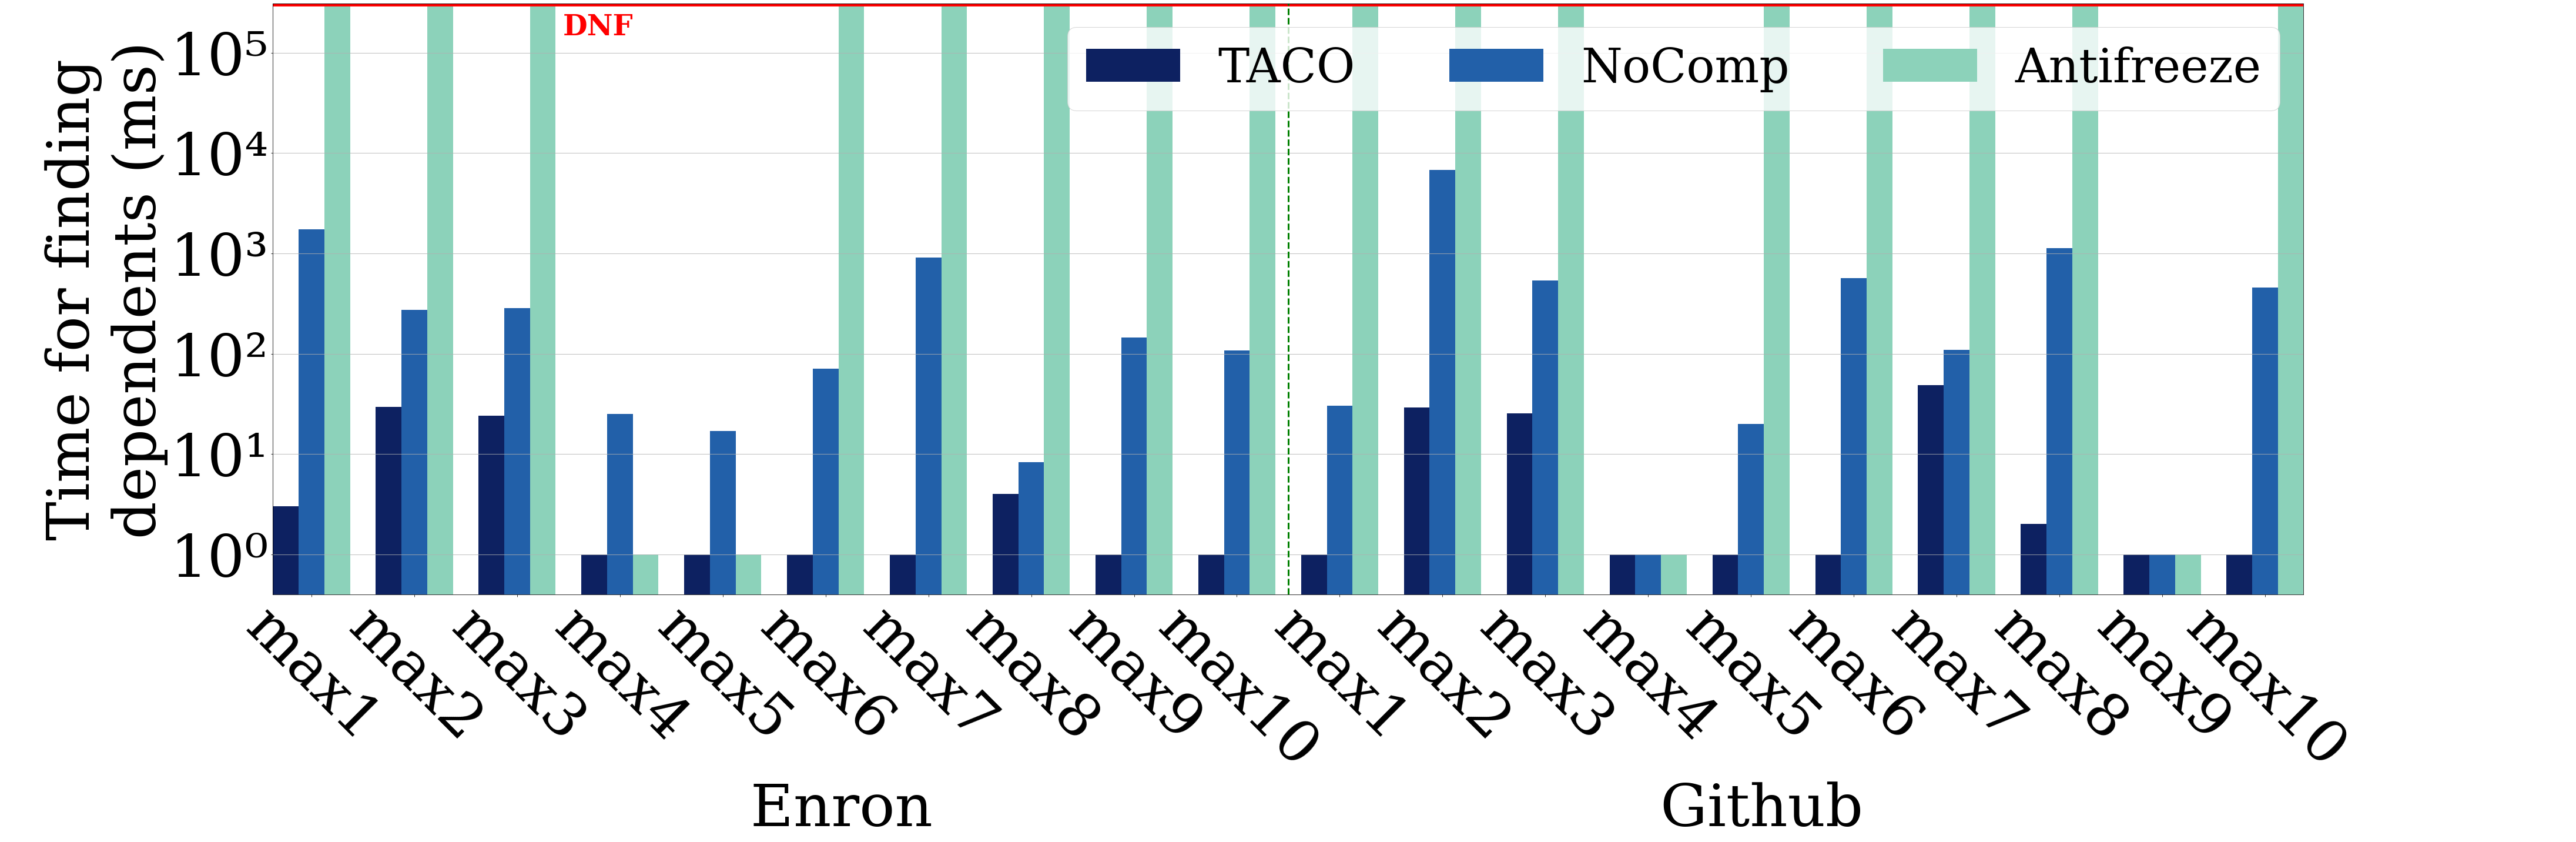

In [75]:
plot_bar_chart(lookup_compare, 
               plot_filename_list,
               label_column_dict={"TACO": "max_taco_time", "NoComp": "max_nocomp_time", "Antifreeze": "LookupTime"},
               xlabel=plot_filename_label,
               ylabel="Time for finding\n dependents (ms)",
               y_tick_min=0,
               y_tick_max=5,
               y_tick_num=5,
               legend_size=80,
               tick_size=100,
               label_size=100,
               fig_size=(55, 20),
               save_path="./figures/lookup_compare_2.pdf"
              )

### 5.2 Graph Build Time

In [76]:
enron_graph_top10 = enron_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False)
github_graph_top10 = github_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False)

In [77]:
antifreeze_enron_build = pd.read_excel("./top10_results/enron_antifreeze_graphbuild_result.xlsx")
antifreeze_github_build = pd.read_excel("./top10_results/github_antifreeze_graphbuild_result.xlsx")

In [78]:
enron_graph_compare = dnf_process(pd.merge(enron_graph_top10, antifreeze_enron_build, on=["fileName"], how="inner"))
github_graph_compare = dnf_process(pd.merge(github_graph_top10, antifreeze_github_build, on=["fileName"], how="inner"))

In [79]:
graph_compare = pd.concat([enron_graph_compare, github_graph_compare]).reset_index(drop=True).set_index("fileName")
graph_compare = graph_compare.loc[filename_order].reset_index()
graph_compare

,fileName,TACO_GraphBuildTime,NoComp_GraphBuildTime,GraphBuildTime
0,benjamin_rogers_000_1_1.pst.39.xls,16625.5,7703.5,300000.000000
1,vkaminski_001_1_2_1.pst.62.xls,14965.5,1451.5,300000.000000
2,mark_haedicke_000_1_2.pst.31.xls,5251.0,1571.0,300000.000000
3,gstorey_000_1_1.pst.116.xls,5006.5,2217.0,213745.333333
4,john_lavorato_000_1_1_1.pst.57.xls,4983.5,1584.0,137516.000000
5,phillip_m_love_000_1_1.pst.476.xls,4559.5,1506.5,300000.000000
6,harry_arora_000_1_1.pst.130.xls,4478.0,2436.0,300000.000000
7,jim_schwieger_000_1_1.pst.111.xls,4029.5,937.5,300000.000000
8,vkaminski_002_1_1_1.pst.12.xls,3886.5,1707.5,300000.000000
9,kam_keiser_000_1_1.pst.16.xls,3771.5,1388.0,300000.000000


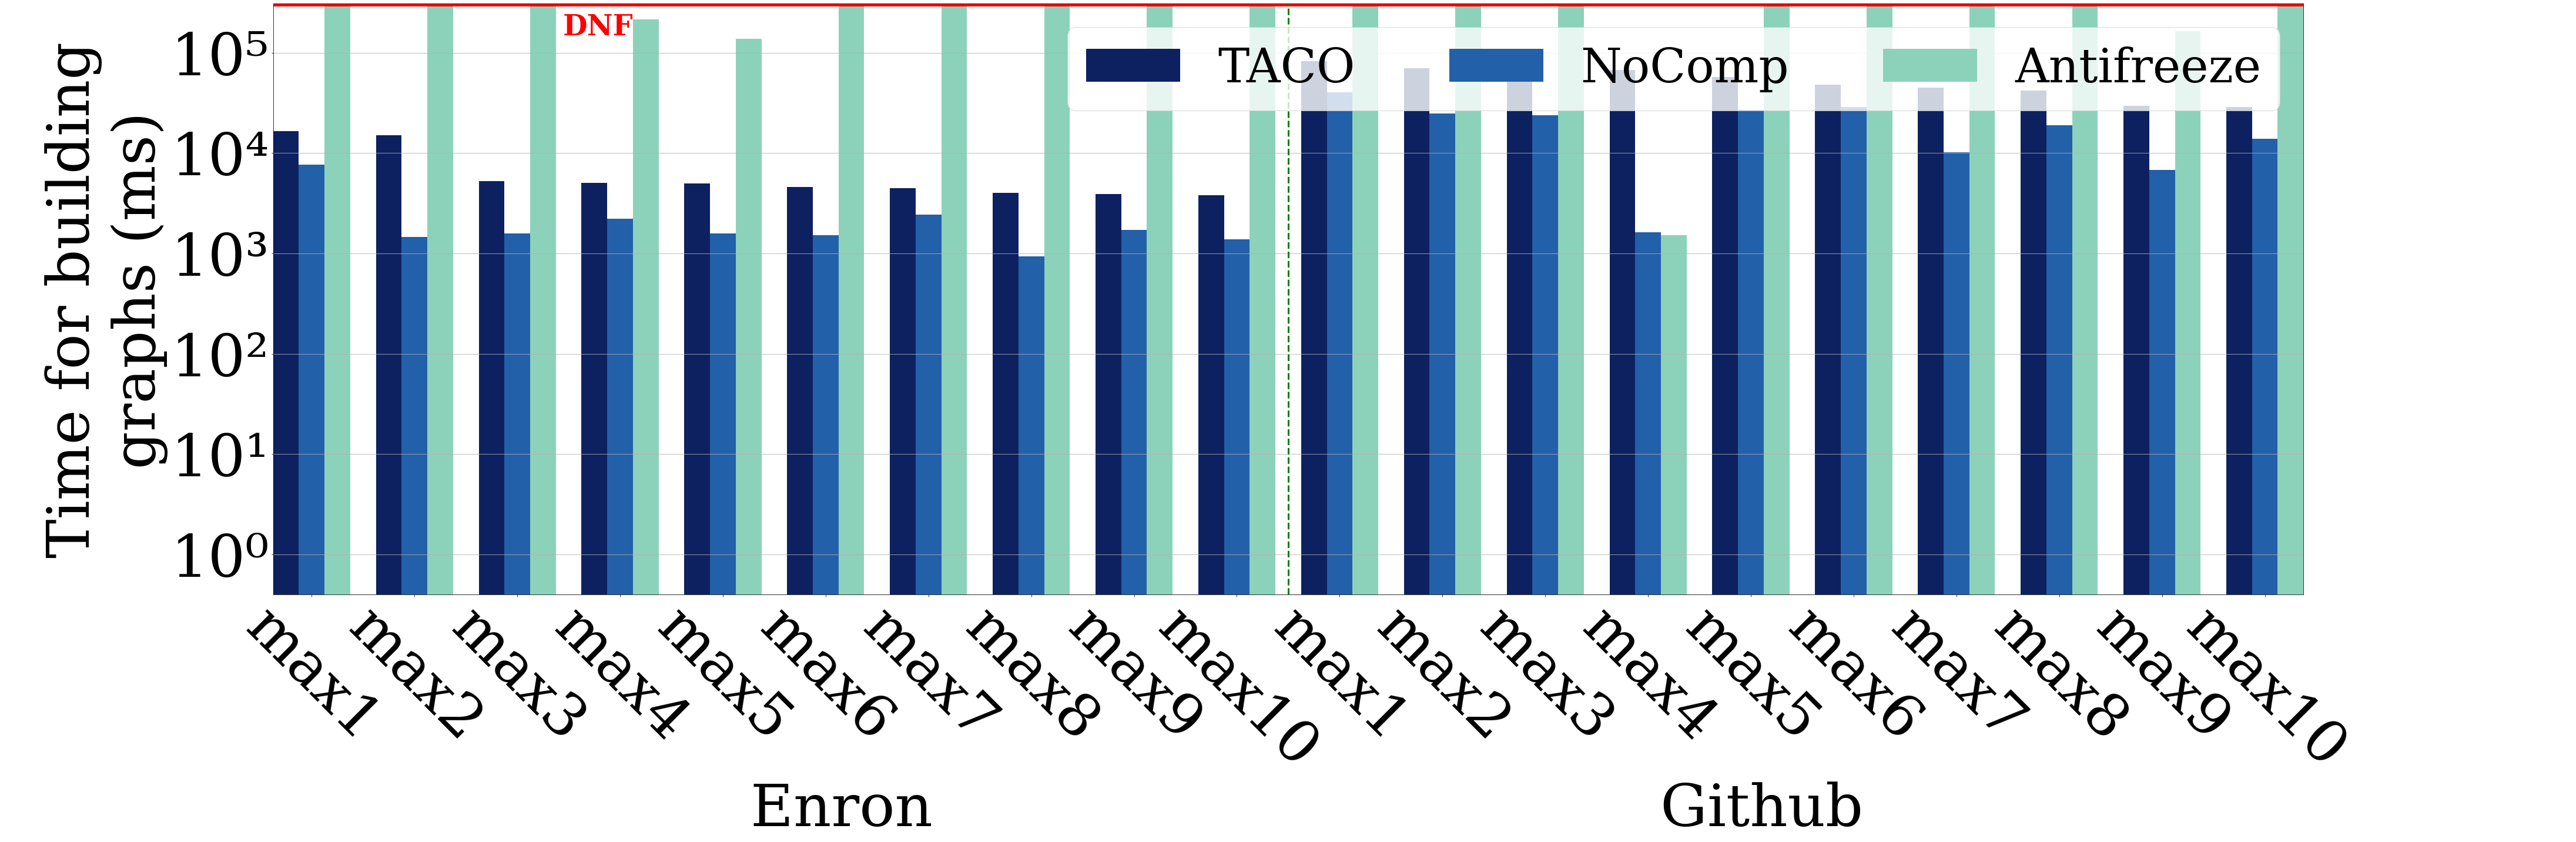

In [80]:
plot_bar_chart(graph_compare, 
               plot_filename_list,
               label_column_dict={"TACO": "TACO_GraphBuildTime", "NoComp": "NoComp_GraphBuildTime", "Antifreeze": "GraphBuildTime"},
               xlabel=plot_filename_label,
               ylabel="Time for building\n graphs (ms)",
               y_tick_min=0,
               y_tick_max=5,
               y_tick_num=5,
               legend_size=80,
               tick_size=100,
               label_size=100,
               fig_size=(55, 20),
               save_path="./figures/graphbuild_compare_2.pdf"
              )

### 5.3 Graph Modify Time

In [81]:
enron_taco_modify = enron_taco_modify.rename(columns={"GraphModifyTime": "TACO_GraphModifyTime"})
github_taco_modify = github_taco_modify.rename(columns={"GraphModifyTime": "TACO_GraphModifyTime"})
enron_nocomp_modify = enron_nocomp_modify.rename(columns={"GraphModifyTime": "NoComp_GraphModifyTime"})
github_nocomp_modify = github_nocomp_modify.rename(columns={"GraphModifyTime": "NoComp_GraphModifyTime"})

In [82]:
enron_modify_merged = pd.merge(enron_taco_modify, enron_nocomp_modify, on=["fileName"], how="inner")[['fileName', 'TACO_GraphModifyTime', 'NoComp_GraphModifyTime']]
github_modify_merged = pd.merge(github_taco_modify, github_nocomp_modify, on=["fileName"], how="inner")[['fileName', 'TACO_GraphModifyTime', 'NoComp_GraphModifyTime']]

In [83]:
antifreeze_enron_modify = pd.read_excel("./top10_results/enron_antifreeze_modify_results.xlsx")
antifreeze_github_modify = pd.read_excel("./top10_results/github_antifreeze_modify_results.xlsx")

In [84]:
enron_modify_compare = dnf_process(pd.merge(enron_modify_merged, antifreeze_enron_modify, on=["fileName"], how="inner"))
github_modify_compare = dnf_process(pd.merge(github_modify_merged, antifreeze_github_modify, on=["fileName"], how="inner"))

In [85]:
modify_compare = pd.concat([enron_modify_compare, github_modify_compare]).reset_index(drop=True).set_index('fileName')
modify_compare = modify_compare.loc[filename_order].reset_index()
modify_compare

,fileName,TACO_GraphModifyTime,NoComp_GraphModifyTime,GraphModifyTime
0,benjamin_rogers_000_1_1.pst.39.xls,64.333333,53.666667,300000.000000
1,vkaminski_001_1_2_1.pst.62.xls,161.000000,63.000000,300000.000000
2,mark_haedicke_000_1_2.pst.31.xls,1.666667,0.333333,300000.000000
3,gstorey_000_1_1.pst.116.xls,8.666667,10.333333,19440.333333
4,john_lavorato_000_1_1_1.pst.57.xls,14.666667,13.666667,106880.000000
5,phillip_m_love_000_1_1.pst.476.xls,5.333333,4.000000,300000.000000
6,harry_arora_000_1_1.pst.130.xls,9.666667,210.333333,300000.000000
7,jim_schwieger_000_1_1.pst.111.xls,6.000000,0.000000,300000.000000
8,vkaminski_002_1_1_1.pst.12.xls,50.333333,59.333333,300000.000000
9,kam_keiser_000_1_1.pst.16.xls,4.666667,4.333333,300000.000000


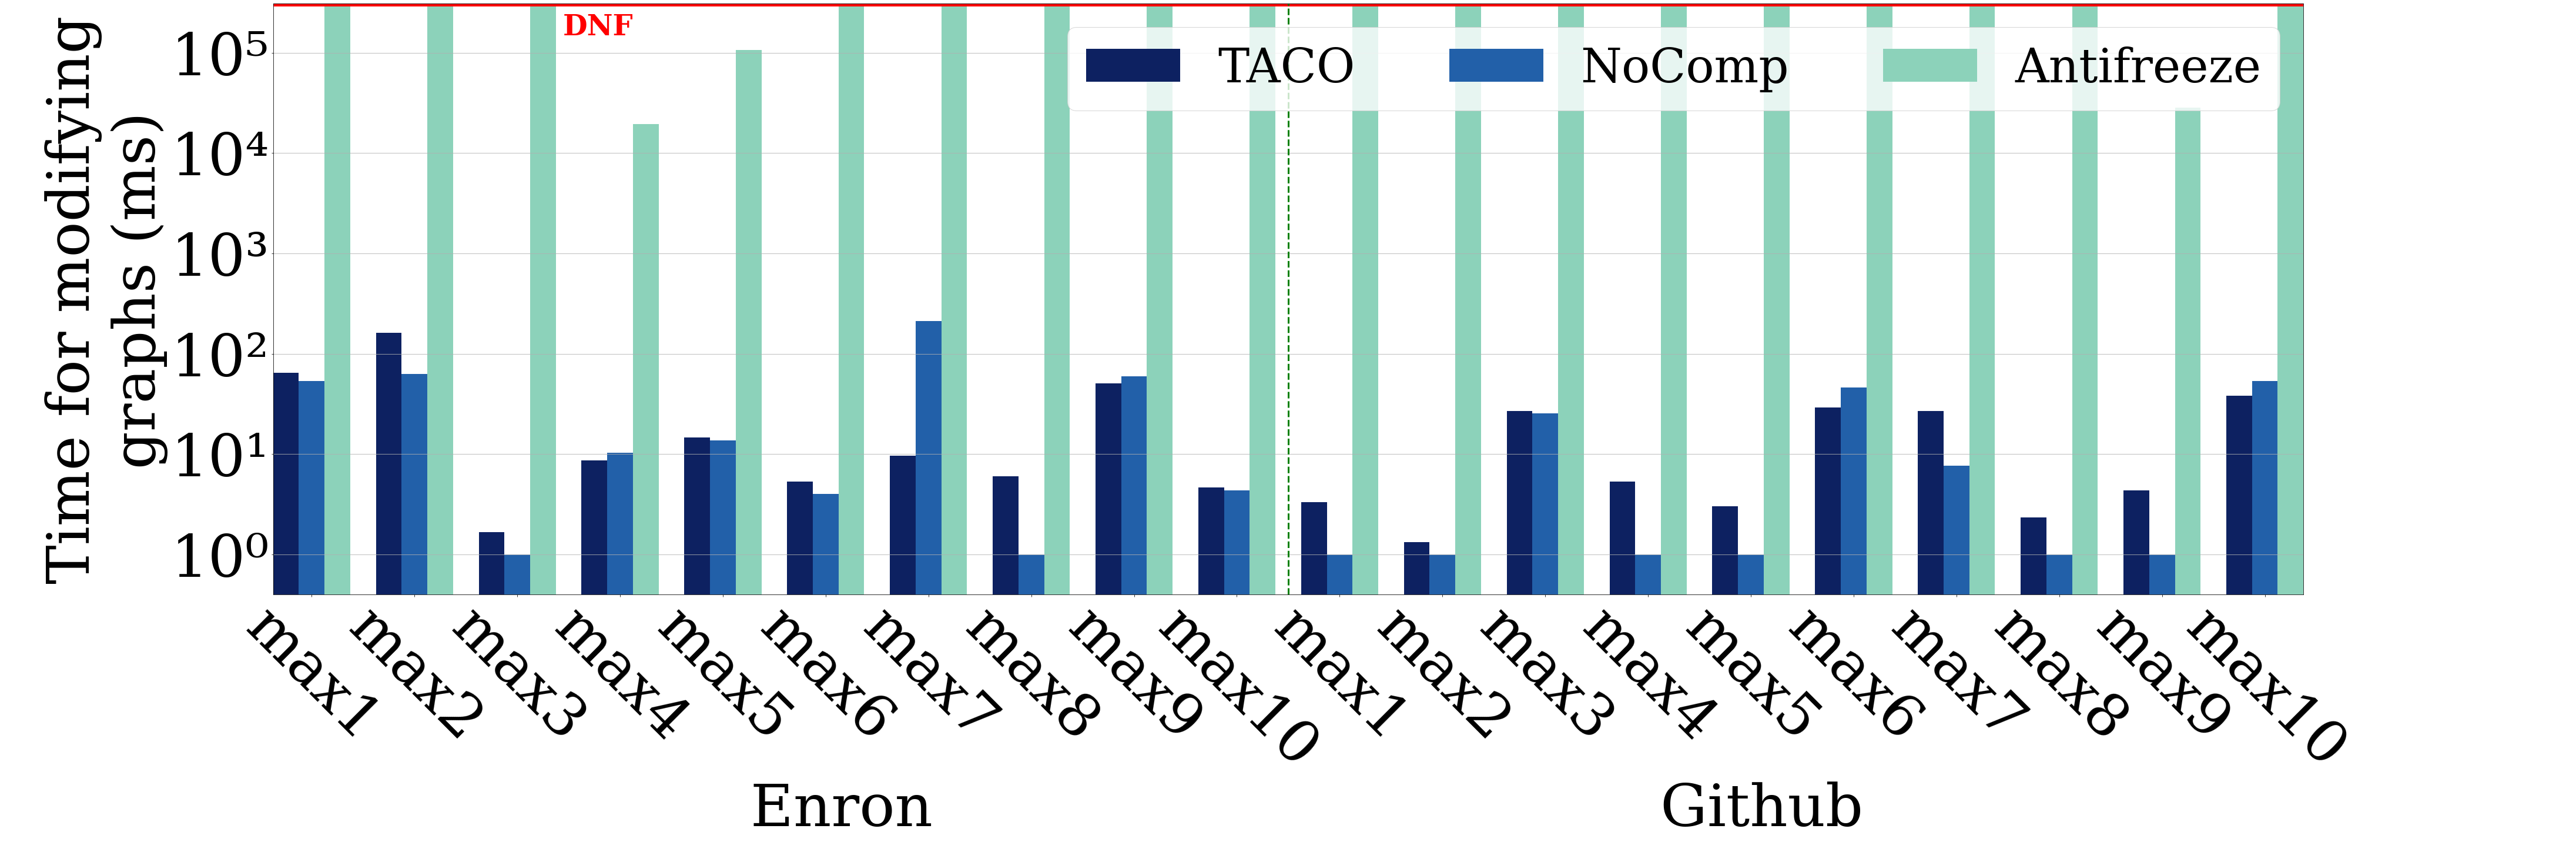

In [86]:
plot_bar_chart(modify_compare, 
               plot_filename_list,
               label_column_dict={"TACO": "TACO_GraphModifyTime", "NoComp": "NoComp_GraphModifyTime", "Antifreeze": "GraphModifyTime"},
               xlabel=plot_filename_label,
               ylabel="Time for modifying\n graphs (ms)",
               y_tick_min=0,
               y_tick_max=5,
               y_tick_num=5,
               legend_size=80,
               tick_size=100,
               label_size=100,
               fig_size=(55, 20),
               save_path="./figures/modify_compare_2.pdf"
              )

### 5.4 Excel Lookup Time

In [87]:
excel_enron = pd.read_excel("./excel_results/excel_enron_lookup_win.xlsx")
excel_github = pd.read_excel("./excel_results/excel_github_lookup_win.xlsx")
taco_enron_win = pd.read_excel("./excel_results/taco_enron_lookup_win.xlsx")
taco_github_win = pd.read_excel("./excel_results/taco_github_lookup_win.xlsx")

In [88]:
excel_enron_compare = pd.merge(excel_enron, taco_enron_win, on=["fileName"], how="inner")
excel_github_compare = pd.merge(excel_github, taco_github_win, on=["fileName"], how="inner")

In [89]:
excel_lookup_compare = pd.concat([excel_enron_compare, excel_github_compare]).reset_index(drop=True)
excel_lookup_compare

,fileName,Excel_LookupTime,LookupTime,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,joe_parks_000_1_1.pst.133.xls,5620.000000,79.666667,29,169,41
1,kevin_ruscitti_000_1_1.pst.125.xls,9213.666667,170.666667,163,181,168
2,benjamin_rogers_001_1_1.pst.153.xls,9640.333333,35.000000,33,38,34
3,benjamin_rogers_000_1_1.pst.140.xls,38140.333333,60.333333,40,51,90
4,jim_schwieger_000_1_1.pst.110.xls,9979.000000,172.000000,158,176,182
5,gerald_nemec_000_1_1.pst.11.xls,6385.666667,376.000000,370,391,367
6,vkaminski_001_1_2_1.pst.62.xls,9947.666667,322.666667,255,355,358
7,jeff_dasovich_000_1_1_1.pst.138.xls,8640.333333,28.666667,27,28,31
8,benjamin_rogers_000_1_1.pst.190.xls,12338.666667,28.000000,26,26,32
9,benjamin_rogers_000_1_1.pst.191.xls,9958.333333,27.333333,27,28,27


In [90]:
excel_lookup_compare['ratio'] = excel_lookup_compare['Excel_LookupTime'] / excel_lookup_compare['LookupTime']

In [91]:
excel_lookup_compare.sort_values(by="ratio", ascending=False)

,fileName,Excel_LookupTime,LookupTime,Unnamed: 2,Unnamed: 3,Unnamed: 4,ratio
3,benjamin_rogers_000_1_1.pst.140.xls,38140.333333,60.333333,40,51,90,632.160221
11,standard_deviation_full.xlsx,79760.666667,157.000000,140,149,182,508.029724
8,benjamin_rogers_000_1_1.pst.190.xls,12338.666667,28.000000,26,26,32,440.666667
16,Signals.xlsx,44146.000000,118.000000,110,116,128,374.118644
9,benjamin_rogers_000_1_1.pst.191.xls,9958.333333,27.333333,27,28,27,364.329268
7,jeff_dasovich_000_1_1_1.pst.138.xls,8640.333333,28.666667,27,28,31,301.406977
2,benjamin_rogers_001_1_1.pst.153.xls,9640.333333,35.000000,33,38,34,275.438095
19,teeeest.xlsx,19927.333333,210.666667,203,204,225,94.591772
14,kevin_ruscitti__20327__NGPL_StorageE_Test.xlsx,3963.666667,43.666667,47,45,39,90.770992
0,joe_parks_000_1_1.pst.133.xls,5620.000000,79.666667,29,169,41,70.543933


In [92]:
excel_lookup_compare['Excel_LookupTime'].max(), excel_lookup_compare['LookupTime'].max()

(79760.66666666667, 442.3333333333333)

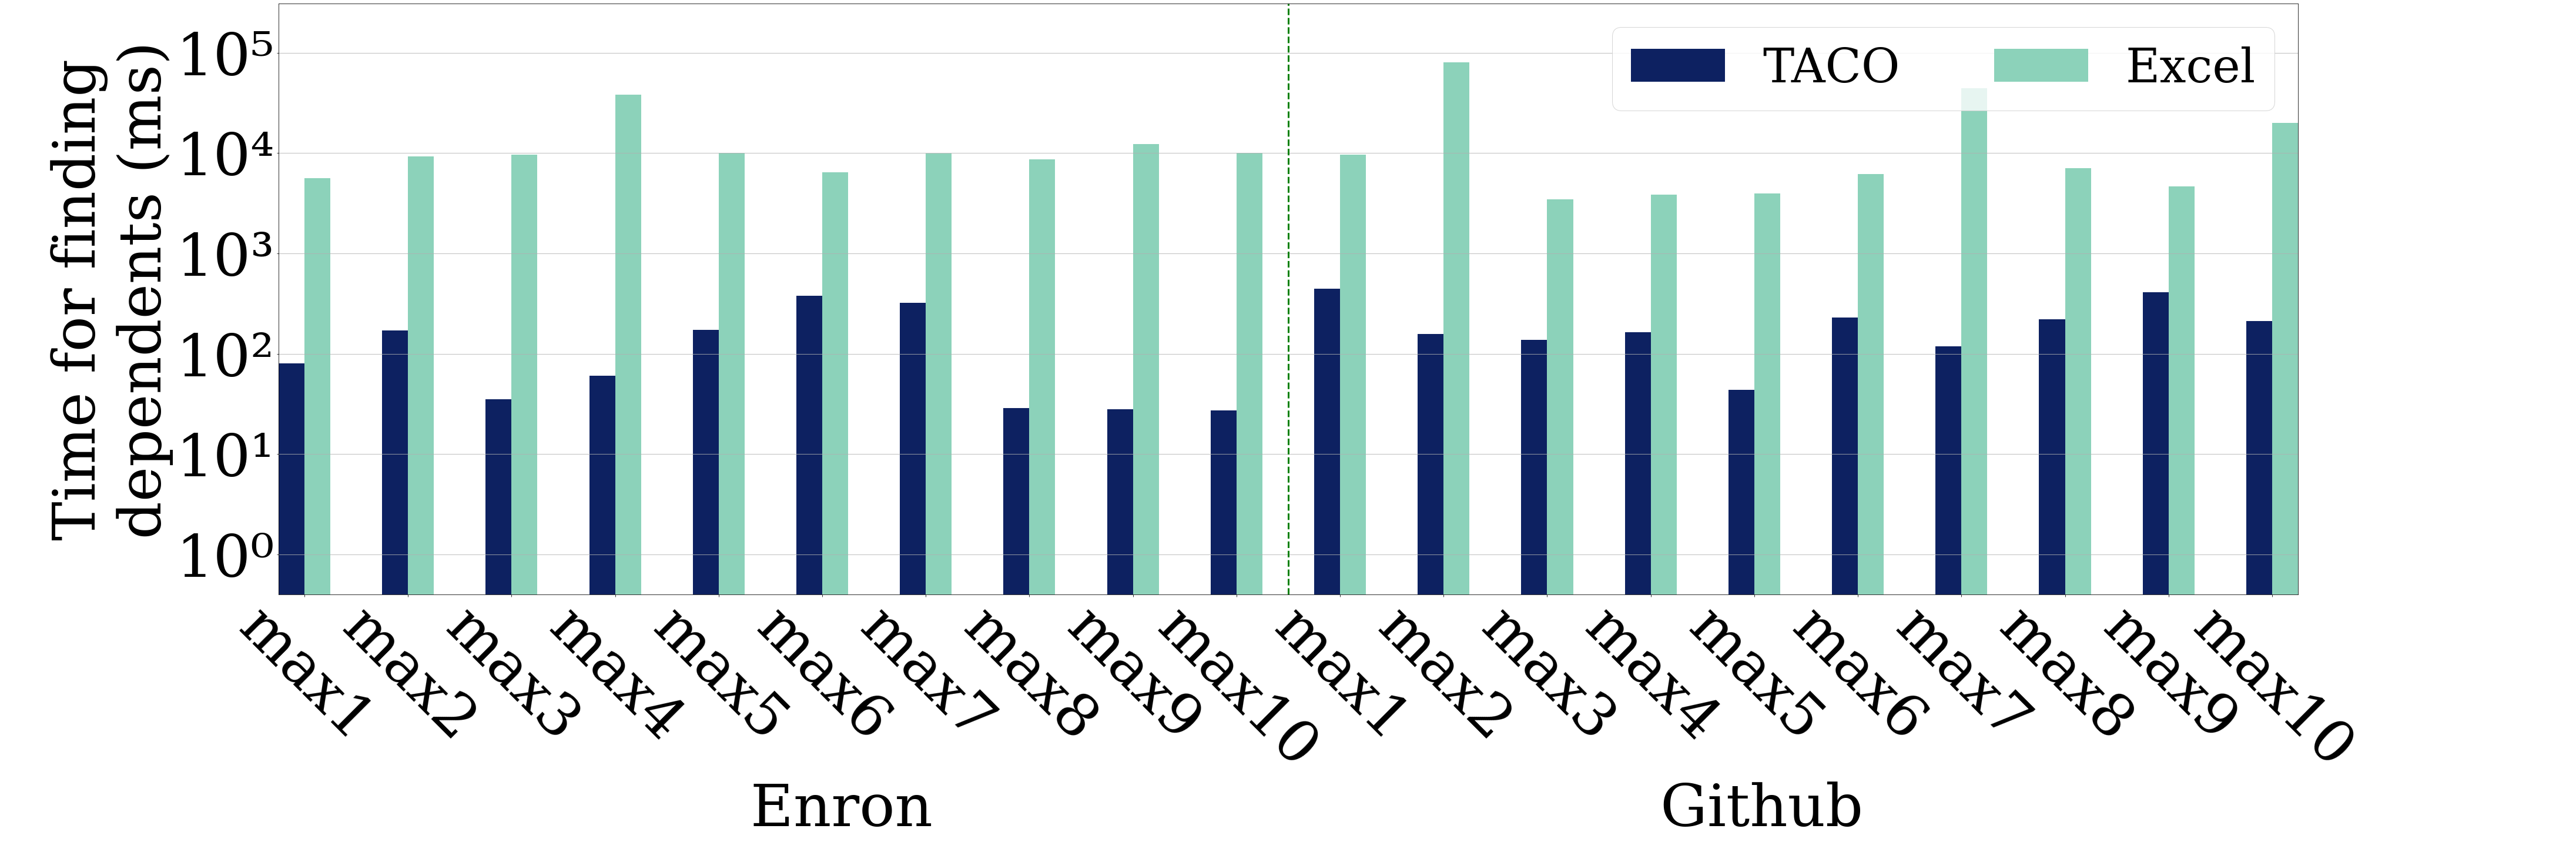

In [93]:
plot_bar_chart(excel_lookup_compare, 
               plot_filename_list,
               label_column_dict={"TACO": "LookupTime", "Excel": "Excel_LookupTime"},
               xlabel=plot_filename_label,
               ylabel="Time for finding\n dependents (ms)",
               y_tick_min=0,
               y_tick_max=5,
               y_tick_num=5,
               legend_size=80,
               tick_size=100,
               label_size=100,
               is_ceil=False,
               fig_size=(55, 20),
               save_path="./figures/excel_lookup_compare.pdf"
              )